In [ ]:
# 1. Instalar el controlador de PostgreSQL
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.1 MB/s eta 0:00:00


In [ ]:
# 2. Importar bibliotecas necesarias
import socket
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
host = 'serveo.net'
port = 5434

def check_server_availability(host, port):
    """Checks if a server is listening on the specified host and port."""
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        try:
            s.connect((host, port))
            return True
        except OSError as e:
            print(f"Server unavailable: {e}")
            return False

if check_server_availability(host, port):
    try:
        conn = psycopg2.connect(
            host=host,
            database='sample_db',
            user='postgres',
            password='admin1234',
            port=port,
            connect_timeout=10
        )
        print("Conexión exitosa a la base de datos.")
    except psycopg2.OperationalError as e:
        print(f"Error al conectar a la base de datos: {e}")
else:
    print(f"Cannot connect to PostgreSQL server at {host}:{port}")


Conexión exitosa a la base de datos.


In [25]:
# Crear una tabla de ejemplo e insertar datos
cursor = conn.cursor()

# Crear la tabla si no existe
cursor.execute("""
    CREATE TABLE IF NOT EXISTS mi_tabla (
        id SERIAL PRIMARY KEY,
        nombre VARCHAR(50),
        edad INT
    )
""")
conn.commit()

# Llenar la tabla con datos de ejemplo
datos = [("Ana", 25), ("Luis", 30), ("Marta", 22), ("Juan", 28), ("Sofía", 35)]
for nombre, edad in datos:
    cursor.execute("INSERT INTO mi_tabla (nombre, edad) VALUES (%s, %s)", (nombre, edad))
conn.commit()

print("Datos insertados en la tabla.")


Datos insertados en la tabla.


<ipython-input-26-aa4249c70ffc>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   id nombre  edad
0   1    Ana    25
1   2   Luis    30
2   3  Marta    22
3   4   Juan    28
4   5  Sofía    35


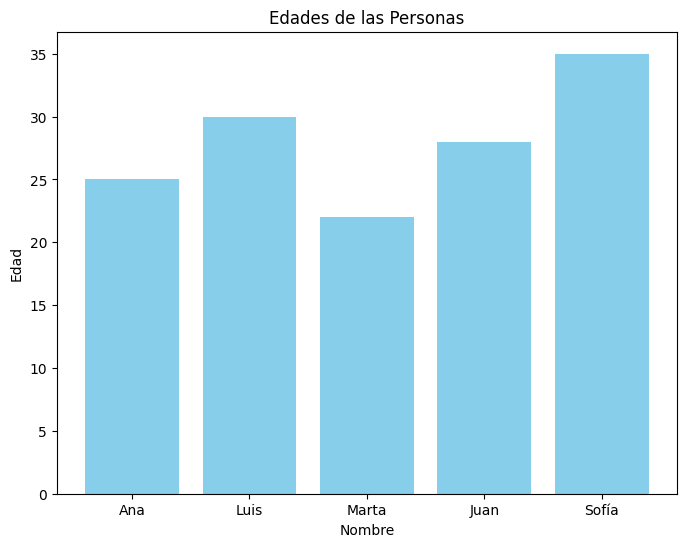

In [26]:
# Leer los datos de la tabla en un DataFrame
query = "SELECT * FROM mi_tabla"
df = pd.read_sql(query, conn)

# Mostrar los datos en Colab
print(df)

# Graficar los datos
plt.figure(figsize=(8, 6))
plt.bar(df['nombre'], df['edad'], color='skyblue')
plt.xlabel("Nombre")
plt.ylabel("Edad")
plt.title("Edades de las Personas")
plt.show()


In [27]:
# Crear y llenar más datos de ejemplo
datos_extra = [
    ("Carlos", 27), ("Laura", 32), ("David", 29), ("Lucía", 23),
    ("Andrés", 40), ("Carmen", 33), ("Fernando", 26), ("Isabel", 31),
    ("Jorge", 37), ("Clara", 28), ("Gabriel", 35), ("Sandra", 24)
]

# Insertar los nuevos datos en la tabla
for nombre, edad in datos_extra:
    cursor.execute("INSERT INTO mi_tabla (nombre, edad) VALUES (%s, %s)", (nombre, edad))
conn.commit()

print("Datos adicionales insertados en la tabla.")


Datos adicionales insertados en la tabla.


<ipython-input-28-e4e6eb87e862>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


    id    nombre  edad
0    1       Ana    25
1    2      Luis    30
2    3     Marta    22
3    4      Juan    28
4    5     Sofía    35
5    6    Carlos    27
6    7     Laura    32
7    8     David    29
8    9     Lucía    23
9   10    Andrés    40
10  11    Carmen    33
11  12  Fernando    26
12  13    Isabel    31
13  14     Jorge    37
14  15     Clara    28
15  16   Gabriel    35
16  17    Sandra    24


<ipython-input-28-e4e6eb87e862>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="nombre", y="edad", palette="viridis")


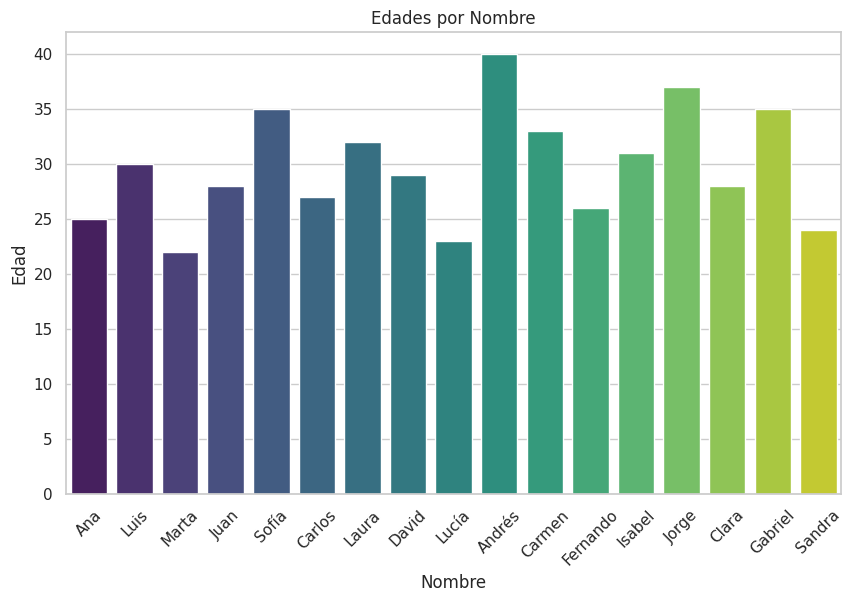

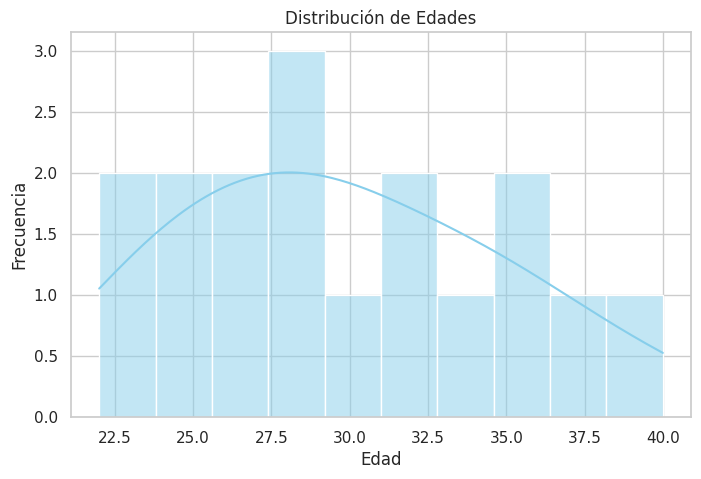

In [28]:
# Leer todos los datos de la tabla en un DataFrame
query = "SELECT * FROM mi_tabla"
df = pd.read_sql(query, conn)

# Visualizar los datos en Colab
print(df)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Gráfico de barras de edades por nombre
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="nombre", y="edad", palette="viridis")
plt.xticks(rotation=45)
plt.title("Edades por Nombre")
plt.xlabel("Nombre")
plt.ylabel("Edad")
plt.show()

# Gráfico de distribución de edades
plt.figure(figsize=(8, 5))
sns.histplot(df['edad'], kde=True, color="skyblue", bins=10)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
cursor.close()
conn.close()
